In [ ]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.svm import SVC # "Support vector classifier"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
clinical_file='/content/drive/MyDrive/HIDS-7009/TCGA_GBM_LGG_clinical_231patients_and_extra.csv'
pyradiomics_file='/content/drive/MyDrive/HIDS-7009/HIDS_7009_Final_project_data_sharing_master_copy/TCGA_pyradiomics/TCGA pyRadiomics recalculated/TCGA_pyradiomics_t1.csv'

In [ ]:
clinical_df=pd.read_csv(clinical_file)
clinical_df.head()

,Row.names,Disease_Type,Gender,Race
0,TCGA-02-0006,GBM,FEMALE,UNKOWN
1,TCGA-02-0037,GBM,FEMALE,UNKOWN
2,TCGA-06-0119,GBM,FEMALE,UNKOWN
3,TCGA-12-1601,GBM,NOT_REPORTED,UNKOWN
4,TCGA-76-6280,GBM,MALE,UNKOWN


In [ ]:
print(clinical_df.shape)

(242, 4)


In [ ]:
pyradiomics_df=pd.read_csv(pyradiomics_file)
pyradiomics_df.head()

,ID,diagnostics_Configuration_EnabledImageTypes,diagnostics_Configuration_Settings,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Hash,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Size,diagnostics_Image-original_Spacing,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Source
0,TCGA-02-0006,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,cf7eef9f6f12a01d6619c43bdd3c73682ea3cb1a,502.0,41.681753,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,18.357560,16.401219,19.026298,308.125,12.901075,0.280044,787.786220,2.556710,384.0,TCGA-GBM
1,TCGA-02-0009,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,2a6de38eb2a01829058381d08d359df1a627f4df,844.0,37.192602,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,31.048349,33.286634,36.249138,4240.375,21.857589,0.353025,3588.790560,0.846338,4349.0,TCGA-GBM
2,TCGA-02-0011,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,abd84417a8ec942a889872dfed222e0e1c56b5df,518.0,36.052124,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,92.763139,70.228199,104.278473,48177.250,52.467970,0.348870,18353.330279,0.380954,48610.0,TCGA-GBM
3,TCGA-02-0027,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,36b7a0b79122686dd0546bc3e79e2695d3118138,2474.0,177.964626,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,40.311289,47.010637,47.968740,7196.875,23.419801,0.398880,4519.303940,0.627954,7587.0,TCGA-GBM
4,TCGA-02-0033,{'Original': {}},"{'minimumROIDimensions': 2, 'minimumROISize': ...",3D,9b8efeae3748d9049ab7982cac58a6c07b6b0477,880.0,35.767669,0.0,"(240, 240, 155)","(1.0, 1.0, 1.0)",...,38.948684,38.910153,41.821047,7054.375,27.698853,0.493544,3604.103902,0.510903,7137.0,TCGA-GBM


In [ ]:
print(pyradiomics_df.shape)

(167, 131)


In [ ]:
merged_df = pd.merge(pyradiomics_df, clinical_df, left_on='ID', right_on='Row.names', how='left')

In [ ]:
merged_df.iloc[:, [*range(1), *range(-5, 0)]]

,ID,Source,Row.names,Disease_Type,Gender,Race
0,TCGA-02-0006,TCGA-GBM,TCGA-02-0006,GBM,FEMALE,UNKOWN
1,TCGA-02-0009,TCGA-GBM,TCGA-02-0009,GBM,FEMALE,WHITE
2,TCGA-02-0011,TCGA-GBM,TCGA-02-0011,GBM,FEMALE,WHITE
3,TCGA-02-0027,TCGA-GBM,TCGA-02-0027,GBM,FEMALE,WHITE
4,TCGA-02-0033,TCGA-GBM,TCGA-02-0033,GBM,MALE,WHITE
...,...,...,...,...,...,...
162,TCGA-HT-8018,TCGA-LGG,TCGA-HT-8018,Oligoastrocytoma,FEMALE,WHITE
163,TCGA-HT-8111,TCGA-LGG,TCGA-HT-8111,Oligoastrocytoma,MALE,WHITE
164,TCGA-HT-8114,TCGA-LGG,TCGA-HT-8114,Oligoastrocytoma,MALE,WHITE
165,TCGA-HT-8563,TCGA-LGG,TCGA-HT-8563,Astrocytoma,FEMALE,WHITE


In [ ]:
print(merged_df.shape)

(167, 135)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 135 entries, ID to Race
dtypes: float64(110), int64(2), object(23)
memory usage: 176.3+ KB


In [ ]:
merged_df.isna().sum()

ID                                             0
diagnostics_Configuration_EnabledImageTypes    0
diagnostics_Configuration_Settings             0
diagnostics_Image-original_Dimensionality      0
diagnostics_Image-original_Hash                0
                                              ..
Source                                         0
Row.names                                      0
Disease_Type                                   0
Gender                                         0
Race                                           0
Length: 135, dtype: int64

In [ ]:
from collections import Counter
Counter(merged_df['Disease_Type'])

Counter({'GBM': 102,
         'Astrocytoma': 21,
         'Oligodendroglioma': 26,
         'Oligoastrocytoma': 18})

In [ ]:
merged_df = merged_df[merged_df['Disease_Type'] != 'Oligoastrocytoma']

In [ ]:
Counter(merged_df['Disease_Type'])

Counter({'GBM': 102, 'Astrocytoma': 21, 'Oligodendroglioma': 26})

In [ ]:
columns_to_drop = ['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash', 'ID', 'Row.names','Source','Gender','Race','diagnostics_Mask-original_CenterOfMassIndex','diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMass']

merged_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
def drop_constant_columns(df):
    # Find columns with only one unique value
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]

    # Drop constant columns
    df.drop(columns=constant_columns, inplace=True)

In [ ]:
drop_constant_columns(merged_df)

In [ ]:
merged_df.head()

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,Disease_Type
0,502.0,41.681753,7,384,213.0,268.7,2.209929e+07,1.867801,31.0,2.516138,...,18.357560,16.401219,19.026298,308.125,12.901075,0.280044,787.786220,2.556710,384.0,GBM
1,844.0,37.192602,4,4349,246.0,291.0,3.119856e+08,1.669089,24.0,3.456869,...,31.048349,33.286634,36.249138,4240.375,21.857589,0.353025,3588.790560,0.846338,4349.0,GBM
2,518.0,36.052124,22,48610,181.0,236.0,2.151917e+09,1.866797,26.0,3.479689,...,92.763139,70.228199,104.278473,48177.250,52.467970,0.348870,18353.330279,0.380954,48610.0,GBM
3,2474.0,177.964626,77,7587,1082.0,1539.0,1.301408e+10,4.789586,225.0,3.227854,...,40.311289,47.010637,47.968740,7196.875,23.419801,0.398880,4519.303940,0.627954,7587.0,GBM
4,880.0,35.767669,9,7137,220.0,256.0,4.046741e+08,1.515616,16.0,7.582218,...,38.948684,38.910153,41.821047,7054.375,27.698853,0.493544,3604.103902,0.510903,7137.0,GBM


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_df=merged_df['Disease_Type']
X_df=merged_df.drop(columns=['Disease_Type'])

In [ ]:
X_df.shape, y_df.shape

((149, 111), (149,))

In [ ]:
Counter(y_df)

Counter({'GBM': 102, 'Astrocytoma': 21, 'Oligodendroglioma': 26})

In [ ]:
categorical_columns=X_df.select_dtypes(include=["object"]).columns
categorical_columns

X_encoded = pd.get_dummies(X_df, columns=categorical_columns, drop_first=True, dtype=int)

print(X_encoded.shape)

(149, 111)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_df, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((119, 111), (30, 111))

In [ ]:
Counter(y_train), Counter(y_test)

(Counter({'GBM': 82, 'Oligodendroglioma': 19, 'Astrocytoma': 18}),
 Counter({'GBM': 20, 'Oligodendroglioma': 7, 'Astrocytoma': 3}))

In [ ]:
# Define the continuous and categorical columns
continuous_columns = X_train.select_dtypes(exclude=["object"]).columns
# Separate continuous variables from the DataFrame
X_continuous_train = X_train[continuous_columns]
X_continuous_test = X_test[continuous_columns]

In [ ]:
scaler = StandardScaler()
scaler.fit(X_continuous_train)

StandardScaler()

In [ ]:
# Transform the continuous variables
X_continuous_train_scaled = scaler.transform(X_continuous_train)
X_continuous_test_scaled = scaler.transform(X_continuous_test)

# Combine scaled continuous variables with one-hot encoded categorical variables
categorical_columns = [col for col in X_train.columns if col not in continuous_columns]
X_train = pd.DataFrame(
    np.hstack((X_continuous_train_scaled, X_train.drop(columns=continuous_columns).values)),
    columns=np.concatenate((continuous_columns, categorical_columns))
)

X_test = pd.DataFrame(
    np.hstack((X_continuous_test_scaled, X_test.drop(columns=continuous_columns).values)),
    columns=np.concatenate((continuous_columns, categorical_columns))
)

In [ ]:
X_train.shape, X_test.shape

((119, 111), (30, 111))

In [ ]:
X_train

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.307729,-0.328990,1.679184,-0.316011,-0.314348,-0.372249,-0.153948,-1.320991,-0.392957,0.803845,...,0.202910,0.194748,0.097059,0.374758,-0.314286,-0.623042,0.285198,-0.342114,-0.427698,-0.316011
1,0.919275,1.524203,-0.269417,-0.006884,1.789088,2.083124,0.352797,2.473523,2.876681,-1.051526,...,0.129162,0.804800,0.811052,1.220690,-0.004910,0.684028,-0.579294,0.497304,-0.323250,-0.006884
2,-0.219306,-0.327456,-0.847907,-0.727769,-0.334399,-0.387254,-0.155490,-1.378099,-0.392957,-0.210862,...,-1.143134,-1.094235,-1.440908,-1.097136,-0.719869,-1.340741,0.525267,-0.899107,-0.170817,-0.727769
3,0.457566,1.149387,-0.025841,-0.499046,1.606720,1.208738,-0.041065,1.168604,0.097153,0.025003,...,-0.832276,-0.171012,-0.072293,-0.299375,-0.492313,-0.910315,1.381165,-0.711003,-0.495930,-0.499046
4,-0.344659,-0.341581,-0.969695,-0.801372,-0.354450,-0.399531,-0.155712,-1.417742,-0.389600,-0.756510,...,-2.484670,-2.309526,-2.299168,-2.437830,-0.792032,-2.181711,2.213696,-1.084880,0.280693,-0.801372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-0.294205,-0.312572,0.948459,-0.609775,-0.287614,-0.320414,-0.154671,-0.429834,-0.292249,-0.629995,...,-0.217017,-0.206402,-0.015143,-0.347912,-0.625412,-0.148821,-1.069772,-0.291858,0.319369,-0.609775
115,-0.176481,-0.187848,-0.969695,-0.478890,-0.021223,-0.097384,-0.148081,0.007277,-0.225111,-0.034717,...,-0.974675,0.456036,0.283349,0.485710,-0.471825,-0.820184,-0.045816,-0.431577,-0.312248,-0.478890
116,0.053073,0.222477,-0.634779,-0.707274,0.299591,0.168615,-0.150042,0.424518,-0.124403,0.154100,...,-1.176245,-1.289786,-1.403560,-1.280566,-0.700594,-1.260021,0.655930,-0.876626,-0.242507,-0.707274
117,-0.210983,-0.212645,-0.908801,-0.803783,0.269611,0.121826,-0.155646,0.142928,-0.235182,3.727667,...,-1.511050,-2.132127,-2.413559,-1.383443,-0.794379,-2.272907,2.573291,-1.093840,0.620210,-0.803783


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline

In [ ]:
def train_and_dump_best_model(X_train, y_train):

    X, y = X_train, y_train
    print(X.shape)
    print(y.shape)

    ### Define pipelines
    # Construct pipelines
    pipe_svm = Pipeline([('clf', SVC(random_state=42))])
    pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

    # Set grid search parameters
    grid_params_svm = {'clf__kernel': ['linear', 'rbf'],
                       'clf__C': [0.1, 1, 10],
                       'clf__gamma': ['scale', 'auto']}

    grid_params_rf = {'clf__n_estimators': [100, 200, 300],
                      'clf__criterion': ['gini', 'entropy'],
                      'clf__max_depth': [None, 10, 20],
                      'clf__min_samples_split': [2, 5, 10],
                      'clf__min_samples_leaf': [1, 2, 4],
                      'clf__max_features': ['auto', 'sqrt', 'log2']}

    # Construct grid searches
    jobs = -1
    folds = 5
    scoring = 'accuracy'  # Adjust scoring metric as needed
    gs_svm = GridSearchCV(estimator=pipe_svm,
                          param_grid=grid_params_svm,
                          scoring=scoring,
                          cv=folds,
                          n_jobs=jobs)

    gs_rf = GridSearchCV(estimator=pipe_rf,
                         param_grid=grid_params_rf,
                         scoring=scoring,
                         cv=folds,
                         n_jobs=jobs)

    # List of pipelines for ease of iteration
    grids = [gs_rf, gs_svm]

    # Dictionary of pipelines and classifier types for ease of reference
    grid_dict = {0: 'Random Forest', 1: 'SVM'}

    print('Performing model optimizations...')
    best_score = 0.0
    best_clf = 0
    best_gs = None
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        # Fit grid search
        gs.fit(X, y)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best training score: %.3f' % gs.best_score_)
        if gs.best_score_ > best_score:
            best_score = gs.best_score_
            best_gs = gs
            best_clf = idx

    print('\nBest Classifier with best hyperparameters: %s' % grid_dict[best_clf])

    return best_gs

In [ ]:
best_model_gs = train_and_dump_best_model(X_train, y_train)

(119, 111)
(119,)
Performing model optimizations...

Estimator: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best params: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Best training score: 0.781

Estimator: SVM
Best params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best training score: 0.764

Best Classifier with best hyperparameters: Random Forest


                   precision    recall  f1-score   support

      Astrocytoma       0.50      0.33      0.40         3
              GBM       0.77      0.85      0.81        20
Oligodendroglioma       0.50      0.43      0.46         7

         accuracy                           0.70        30
        macro avg       0.59      0.54      0.56        30
     weighted avg       0.68      0.70      0.69        30



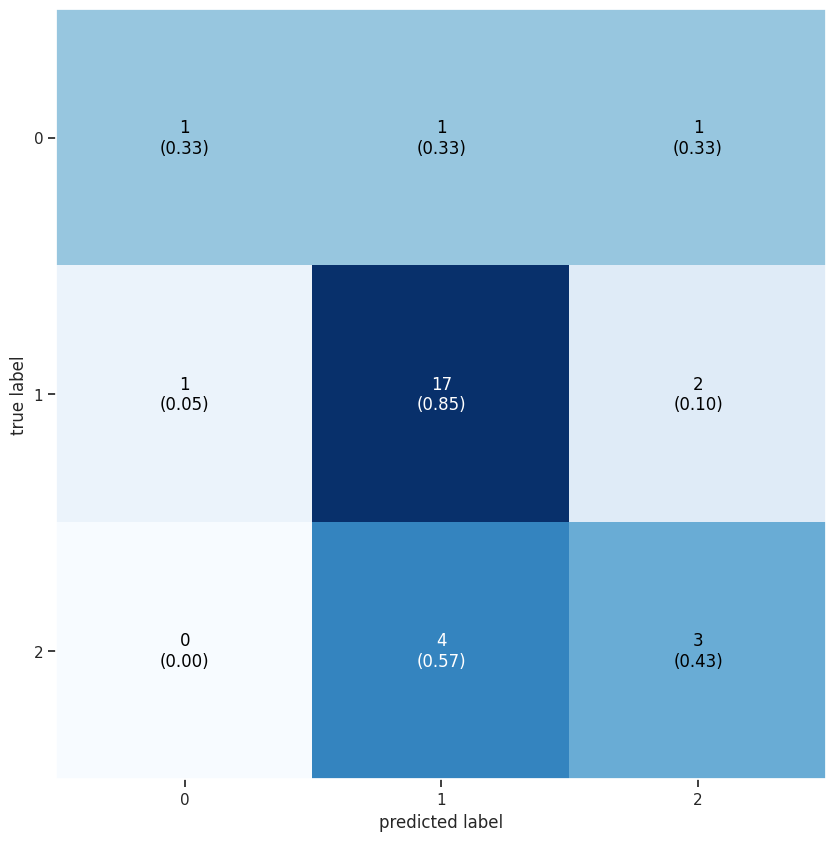

In [ ]:
y_test_pred = best_model_gs.predict(X_test)

#Evaluation metrics
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred),
                      show_absolute = True,
                      show_normed = True)
print(classification_report(y_test,y_test_pred))

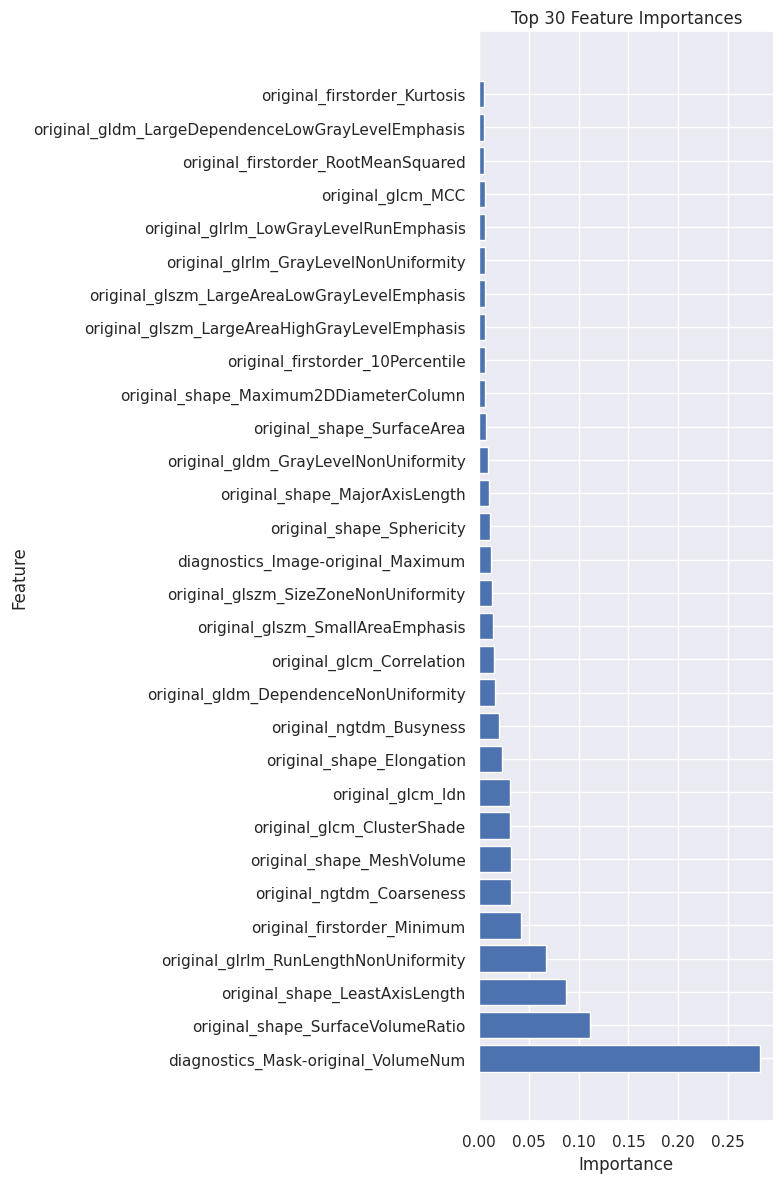

Top 30 Feature Importances:
diagnostics_Mask-original_VolumeNum: 0.2819120437057628
original_shape_SurfaceVolumeRatio: 0.11105004895101837
original_shape_LeastAxisLength: 0.08728163376671247
original_glrlm_RunLengthNonUniformity: 0.06752975376427464
original_firstorder_Minimum: 0.04176528722864616
original_ngtdm_Coarseness: 0.03261289738665619
original_shape_MeshVolume: 0.032429612575894086
original_glcm_ClusterShade: 0.03141367474362336
original_glcm_Idn: 0.0309784571504936
original_shape_Elongation: 0.02308064310752932
original_ngtdm_Busyness: 0.020562612613707724
original_gldm_DependenceNonUniformity: 0.015992199316493896
original_glcm_Correlation: 0.015573574755465376
original_glszm_SmallAreaEmphasis: 0.013823828892110108
original_glszm_SizeZoneNonUniformity: 0.013593511820636013
diagnostics_Image-original_Maximum: 0.012033845158282395
original_shape_Sphericity: 0.010879740622400375
original_shape_MajorAxisLength: 0.010649618356867287
original_gldm_GrayLevelNonUniformity: 0.0095991

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel

# Initialize the GBM classifier
gbm = GradientBoostingClassifier()

# Train the classifier
gbm.fit(X_train, y_train)

# Extract feature importances
importances = gbm.feature_importances_

# Get indices of the top 30 features
top_30_indices = np.argsort(importances)[::-1][:30]

# Get the names of the top 30 features
top_30_features = [X_train.columns[i] for i in top_30_indices]

# Plot the feature importances
plt.figure(figsize=(8, 12))  # Adjust the figure size as needed
plt.title("Top 30 Feature Importances")
plt.barh(range(len(top_30_indices)), importances[top_30_indices], align="center")
plt.yticks(range(len(top_30_indices)), top_30_features)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Print the feature importance scores
print("Top 30 Feature Importances:")
for feature, importance in zip(top_30_features, importances[top_30_indices]):
    print(f"{feature}: {importance}")

Valid

In [ ]:
re_file='/content/drive/MyDrive/HIDS-7009/final_project_step1_radiomics_features.csv'
truth_file='/content/drive/MyDrive/HIDS-7009/HIDS_7009_Final_project_data_sharing_master_copy/REMBRANDT_clinical_ground_truth/Rembrandt_Clinical_ground_truth_64set.txt'

In [ ]:
re_df=pd.read_csv(re_file)
re_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Folder_ID
0,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d1cf83b9109332101100675f4086a082b4be3353,3D,"(1.0, 1.0, 1.0)",...,0.024288,5.447575,0.045635,3.284154e+04,13.613067,0.000968,14.299668,0.009642,0.043031,HF1409_1994.09.23
1,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},561df89a3459494f92be755fc4bb7a97e3f1459b,3D,"(1.0, 1.0, 1.0)",...,0.027599,5.330263,0.034273,5.812334e+04,15.629922,0.001225,6.948925,0.005012,0.039851,HF1458_1994.12.28
2,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8a0c7af4b9c9df45a7f09a04c470c8bb32006ffe,3D,"(1.0, 1.0, 1.0)",...,0.063439,4.050506,0.011416,1.587788e+05,17.526233,0.002308,4.465069,0.008526,0.032646,HF1381_1994.08.12
3,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},998661365fefc4e50959e7d8fc21247b3cb2336f,3D,"(1.0, 1.0, 1.0)",...,0.010778,6.106595,0.007910,3.025511e+06,42.437628,0.000140,25.724557,0.004179,0.016446,HF1433_1994.11.11
4,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},303b156bb3c47328a9a7d85e368050797818b3a6,3D,"(1.0, 1.0, 1.0)",...,0.078036,5.295338,0.022014,1.956068e+05,46.050784,0.001101,8.385659,0.016870,0.044011,HF1318_1994.04.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5523b17154aceb63840c645d12b812334fe33034,3D,"(1.0, 1.0, 1.0)",...,0.036043,4.194625,0.007755,2.791954e+05,9.176325,0.002123,5.661678,0.004584,0.072928,900-00-5385_2005.08.07
60,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b73b10e22000346f233680cc7cffc5f4b59bba85,3D,"(1.0, 1.0, 1.0)",...,0.039469,5.709081,0.006663,2.432420e+05,7.166340,0.001574,33.506245,0.025831,0.124282,900-00-5476_2005.12.04
61,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},550d432eff845a7f06c84fcb28375d516be50b47,3D,"(1.0, 1.0, 1.0)",...,0.114953,5.031294,0.018097,5.760957e+04,40.651462,0.001744,2.708746,0.012772,0.016804,900-00-5404_2005.09.03
62,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73763da9d2b39583c94683273ffa05baf09f29de,3D,"(1.0, 1.0, 1.0)",...,0.059807,4.057116,0.008418,1.540126e+05,16.788784,0.002099,9.493401,0.020985,0.048552,900-00-5459_2005.11.21


In [ ]:
truth_df=pd.read_csv(truth_file,sep='\t')
truth_df

,64.patient.set,AGE_RANGE,GENDER,DISEASE_TYPE
0,900_00_5299,NaN,NaN,NaN
1,900_00_5303,NaN,NaN,NaN
2,900_00_5308,NaN,,ASTROCYTOMA
3,900_00_5316,NaN,,GBM
4,900_00_5317,NaN,,GBM
...,...,...,...,...
59,HF1606,60-64,MALE,ASTROCYTOMA
60,HF1613,35-39,MALE,ASTROCYTOMA
61,HF1652,NaN,NaN,NaN
62,HF1677,50-54,MALE,ASTROCYTOMA


In [ ]:
re_df.rename(columns={'Folder_ID': 'patient_id'}, inplace=True)
re_df['patient_id'] = re_df['patient_id'].str.split('_').str[0].str.replace('-', '_')
re_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient_id
0,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d1cf83b9109332101100675f4086a082b4be3353,3D,"(1.0, 1.0, 1.0)",...,0.024288,5.447575,0.045635,3.284154e+04,13.613067,0.000968,14.299668,0.009642,0.043031,HF1409
1,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},561df89a3459494f92be755fc4bb7a97e3f1459b,3D,"(1.0, 1.0, 1.0)",...,0.027599,5.330263,0.034273,5.812334e+04,15.629922,0.001225,6.948925,0.005012,0.039851,HF1458
2,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8a0c7af4b9c9df45a7f09a04c470c8bb32006ffe,3D,"(1.0, 1.0, 1.0)",...,0.063439,4.050506,0.011416,1.587788e+05,17.526233,0.002308,4.465069,0.008526,0.032646,HF1381
3,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},998661365fefc4e50959e7d8fc21247b3cb2336f,3D,"(1.0, 1.0, 1.0)",...,0.010778,6.106595,0.007910,3.025511e+06,42.437628,0.000140,25.724557,0.004179,0.016446,HF1433
4,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},303b156bb3c47328a9a7d85e368050797818b3a6,3D,"(1.0, 1.0, 1.0)",...,0.078036,5.295338,0.022014,1.956068e+05,46.050784,0.001101,8.385659,0.016870,0.044011,HF1318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5523b17154aceb63840c645d12b812334fe33034,3D,"(1.0, 1.0, 1.0)",...,0.036043,4.194625,0.007755,2.791954e+05,9.176325,0.002123,5.661678,0.004584,0.072928,900_00_5385
60,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b73b10e22000346f233680cc7cffc5f4b59bba85,3D,"(1.0, 1.0, 1.0)",...,0.039469,5.709081,0.006663,2.432420e+05,7.166340,0.001574,33.506245,0.025831,0.124282,900_00_5476
61,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},550d432eff845a7f06c84fcb28375d516be50b47,3D,"(1.0, 1.0, 1.0)",...,0.114953,5.031294,0.018097,5.760957e+04,40.651462,0.001744,2.708746,0.012772,0.016804,900_00_5404
62,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73763da9d2b39583c94683273ffa05baf09f29de,3D,"(1.0, 1.0, 1.0)",...,0.059807,4.057116,0.008418,1.540126e+05,16.788784,0.002099,9.493401,0.020985,0.048552,900_00_5459


In [ ]:
valid_df = pd.merge(re_df, truth_df, left_on='patient_id', right_on='64.patient.set', how='left')
valid_df

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient_id,64.patient.set,AGE_RANGE,GENDER,DISEASE_TYPE
0,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d1cf83b9109332101100675f4086a082b4be3353,3D,"(1.0, 1.0, 1.0)",...,13.613067,0.000968,14.299668,0.009642,0.043031,HF1409,HF1409,50-54,MALE,ASTROCYTOMA
1,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},561df89a3459494f92be755fc4bb7a97e3f1459b,3D,"(1.0, 1.0, 1.0)",...,15.629922,0.001225,6.948925,0.005012,0.039851,HF1458,HF1458,45-49,MALE,OLIGODENDROGLIOMA
2,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8a0c7af4b9c9df45a7f09a04c470c8bb32006ffe,3D,"(1.0, 1.0, 1.0)",...,17.526233,0.002308,4.465069,0.008526,0.032646,HF1381,HF1381,25-29,MALE,ASTROCYTOMA
3,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},998661365fefc4e50959e7d8fc21247b3cb2336f,3D,"(1.0, 1.0, 1.0)",...,42.437628,0.000140,25.724557,0.004179,0.016446,HF1433,HF1433,45-49,FEMALE,OLIGODENDROGLIOMA
4,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},303b156bb3c47328a9a7d85e368050797818b3a6,3D,"(1.0, 1.0, 1.0)",...,46.050784,0.001101,8.385659,0.016870,0.044011,HF1318,HF1318,50-54,MALE,GBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5523b17154aceb63840c645d12b812334fe33034,3D,"(1.0, 1.0, 1.0)",...,9.176325,0.002123,5.661678,0.004584,0.072928,900_00_5385,900_00_5385,NaN,,ASTROCYTOMA
60,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b73b10e22000346f233680cc7cffc5f4b59bba85,3D,"(1.0, 1.0, 1.0)",...,7.166340,0.001574,33.506245,0.025831,0.124282,900_00_5476,900_00_5476,NaN,,OLIGODENDROGLIOMA
61,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},550d432eff845a7f06c84fcb28375d516be50b47,3D,"(1.0, 1.0, 1.0)",...,40.651462,0.001744,2.708746,0.012772,0.016804,900_00_5404,900_00_5404,NaN,,GBM
62,v3.0.1,1.25.2,2.3.1,1.6.0,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73763da9d2b39583c94683273ffa05baf09f29de,3D,"(1.0, 1.0, 1.0)",...,16.788784,0.002099,9.493401,0.020985,0.048552,900_00_5459,900_00_5459,NaN,,ASTROCYTOMA


In [ ]:
valid_df.dropna(subset=['DISEASE_TYPE'], inplace=True)
print(valid_df.shape)

(58, 134)


In [ ]:
drop_constant_columns(valid_df)
print(valid_df.shape)

(58, 121)


In [ ]:
columns_to_drop = ['diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_CenterOfMassIndex','diagnostics_Mask-original_BoundingBox','diagnostics_Mask-original_CenterOfMass', 'patient_id', '64.patient.set', 'AGE_RANGE', 'GENDER']

valid_df = valid_df.drop(columns=columns_to_drop)

valid_df

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,DISEASE_TYPE
0,86.092317,953.000000,13586,108,0.837661,0.721438,42.037449,58.268963,77.233412,68.949257,...,0.024288,5.447575,0.045635,3.284154e+04,13.613067,0.000968,14.299668,0.009642,0.043031,ASTROCYTOMA
1,82.718819,1202.000000,9862,110,0.593575,0.435035,25.144452,57.798740,58.549125,64.443774,...,0.027599,5.330263,0.034273,5.812334e+04,15.629922,0.001225,6.948925,0.005012,0.039851,OLIGODENDROGLIOMA
2,84.394232,791.000000,4380,2,0.792063,0.569012,14.695993,25.827212,29.410882,29.546573,...,0.063439,4.050506,0.011416,1.587788e+05,17.526233,0.002308,4.465069,0.008526,0.032646,ASTROCYTOMA
3,99.865671,974.000000,88499,43,0.883226,0.744595,45.997113,61.774650,76.537572,73.552702,...,0.010778,6.106595,0.007910,3.025511e+06,42.437628,0.000140,25.724557,0.004179,0.016446,OLIGODENDROGLIOMA
4,93.175837,928.000000,14809,49,0.829212,0.695535,26.206166,37.677719,45.011110,48.270074,...,0.078036,5.295338,0.022014,1.956068e+05,46.050784,0.001101,8.385659,0.016870,0.044011,GBM
5,90.050631,1119.000000,2023,27,0.789912,0.653196,23.992925,36.731594,34.481879,38.600518,...,0.024369,5.622502,0.097874,1.834221e+03,0.579614,0.007290,67.456179,0.005564,1.693561,ASTROCYTOMA
6,74.130710,815.000000,44501,4,0.772736,0.536233,28.757301,53.628386,49.729267,62.649820,...,0.035580,5.229611,0.006696,2.441456e+06,64.632226,0.000271,10.140582,0.004757,0.011423,ASTROCYTOMA
8,127.201558,1350.000000,64854,13,0.647061,0.573791,36.226844,63.135955,54.120237,71.568149,...,0.030774,5.363841,0.007447,1.631846e+06,60.966227,0.000261,17.791136,0.013024,0.013187,ASTROCYTOMA
9,98.418834,1052.000000,37503,33,0.834542,0.664227,30.845687,46.438440,52.153619,64.815122,...,0.044476,5.334864,0.007039,1.002938e+06,34.443773,0.000505,12.211619,0.012598,0.020436,ASTROCYTOMA
10,100.610389,1054.000000,63523,25,0.459889,0.292876,33.213238,113.403635,82.219219,103.585713,...,0.022147,5.687637,0.007855,1.287773e+06,62.131236,0.000207,13.896053,0.007266,0.009897,ASTROCYTOMA


In [ ]:
y_valid=valid_df['DISEASE_TYPE']
X_valid=valid_df.drop(columns=['DISEASE_TYPE'])

In [ ]:
y_valid.replace({'ASTROCYTOMA': 'Astrocytoma', 'OLIGODENDROGLIOMA': 'Oligodendroglioma', 'GBM': 'GBM'}, inplace=True)

In [ ]:
Counter(y_valid)

Counter({'Astrocytoma': 28, 'Oligodendroglioma': 12, 'GBM': 18})

In [ ]:
print(X_valid.shape)

(58, 111)


In [ ]:
column_seq=X_continuous_train.columns.tolist()
X_valid_seq=X_valid[column_seq]

In [ ]:
X_valid_seq.head()

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,953.0,86.092317,108,13586,188.0,254.0,7.031766e+08,2.168177,34.0,3.934111,...,77.233412,68.949257,79.511006,81.123363,11772.375000,48.809643,0.140402,17824.652178,1.514108,13586.0
1,1202.0,82.718819,110,9862,185.0,227.0,4.140665e+08,1.650782,19.0,4.263821,...,58.549125,64.443774,50.447993,73.993243,8900.708333,34.307909,0.251858,8246.662043,0.926518,9862.0
2,791.0,84.394232,2,4380,124.0,163.0,8.988090e+07,1.453015,18.0,3.585289,...,29.410882,29.546573,26.832816,31.591138,4341.833333,20.456789,0.586624,2194.014109,0.505320,4380.0
3,974.0,99.865671,43,88499,243.0,303.0,6.688704e+09,2.045219,30.0,4.809105,...,76.537572,73.552702,73.437048,79.668061,87900.791667,54.560972,0.381475,25061.841505,0.285115,88499.0
4,928.0,93.175837,49,14809,149.0,234.0,4.859450e+08,2.121159,38.0,3.823413,...,45.011110,48.270074,53.338541,55.587768,13950.500000,31.242809,0.272793,10273.329005,0.736413,14809.0


In [ ]:
X_continuous_train.head()

,diagnostics_Image-original_Maximum,diagnostics_Image-original_Mean,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
22,702.0,41.421197,88,15826,222.0,251.0,8.890622e+08,1.142845,15.0,5.665546,...,50.249378,59.481089,54.341513,67.512962,15573.125000,26.281060,0.438563,6876.530382,0.441564,15826.0
15,7779.0,551.190600,24,25826,2425.0,3851.0,2.549525e+11,6.258116,989.0,1.995755,...,49.091751,72.006944,68.264193,85.111691,25582.291667,42.811318,0.289995,14478.355115,0.565952,25826.0
65,1212.0,41.842956,5,2506,201.0,229.0,1.161127e+08,1.065859,15.0,3.658528,...,29.120440,33.015148,24.351591,36.891733,2451.375000,17.204451,0.479820,1832.366156,0.747485,2506.0
11,5116.0,448.087622,32,9905,2234.0,2569.0,5.748474e+10,4.498993,161.0,4.125051,...,34.000000,51.971146,51.039201,53.488316,9813.458333,22.647968,0.626910,3535.846519,0.360306,9905.0
42,489.0,37.957695,1,125,180.0,211.0,4.647334e+06,1.012417,16.0,2.579274,...,8.062258,8.062258,7.615773,9.000000,116.708333,6.568870,0.769985,149.992543,1.285191,125.0


In [ ]:
X_valid_scaled=scaler.transform(X_valid_seq)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


                   precision    recall  f1-score   support

      Astrocytoma       0.40      0.07      0.12        28
              GBM       0.35      1.00      0.51        18
Oligodendroglioma       0.00      0.00      0.00        12

         accuracy                           0.34        58
        macro avg       0.25      0.36      0.21        58
     weighted avg       0.30      0.34      0.22        58



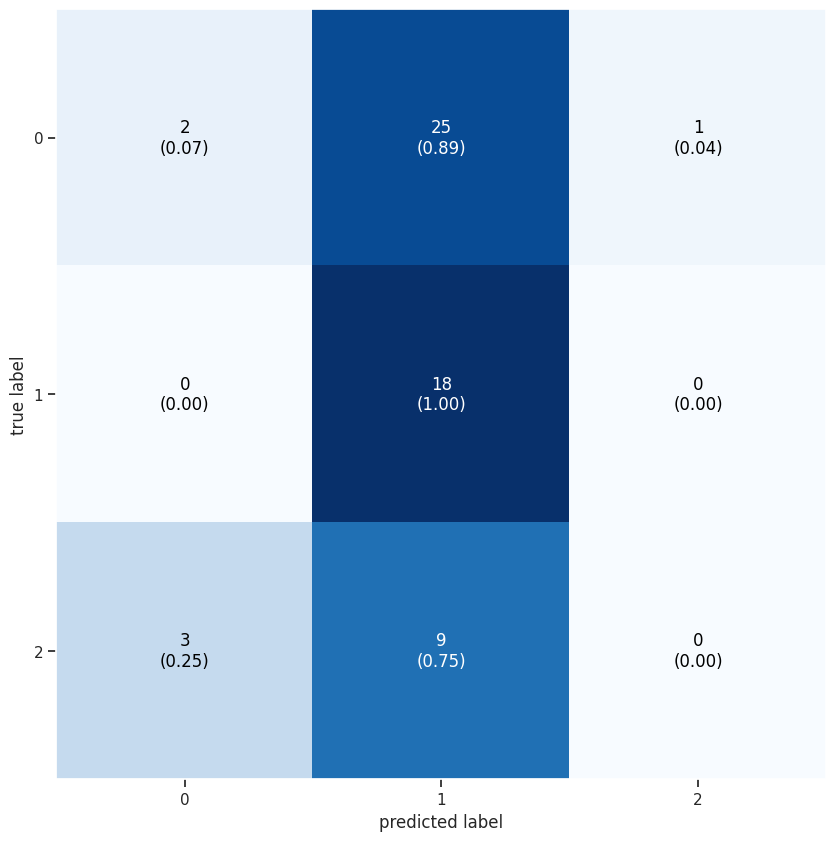

In [ ]:
y_valid_pred = best_model_gs.predict(X_valid_scaled)

#Evaluation metrics
plot_confusion_matrix(confusion_matrix(y_valid, y_valid_pred),
                      show_absolute = True,
                      show_normed = True)
print(classification_report(y_valid,y_valid_pred))